In [1]:
%pip install pandas
%pip install matplotlib
%pip install pydantic


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pydantic import BaseModel, Field
from typing import List, Dict, Optional

In [22]:
# Pydantic models
class User(BaseModel):
    login: str

class Diff(BaseModel):
    addedLines: int
    deletedLines: int
    totalLines: int

class PullRequest(BaseModel):
    id: int
    number: int
    owner: str
    repo: str
    title: str
    created_at: str
    merged_at: Optional[str] = None
    user: User
    html_url: str
    diff: Diff
    processed: bool

    def dump(self):
        return {
            'id': self.id,
            'number': self.number,
            'owner': self.owner,
            'repo': self.repo,
            'title': self.title,
            'created_at': self.created_at,
            'merged_at': self.merged_at,
            'user': self.user.login,
            'html_url': self.html_url,
            'diff': self.diff.totalLines,
            'processed': self.processed
        }


class JsonData(BaseModel):
    pullRequests: List[PullRequest]


In [ ]:
# JSON データの読み込み
json_path = "../output/2025-03-02-openai-openai-cookbook-progress.json"
# json_path = "../output/2025-03-02-All-Hands-AI-agent-analysis-progress.json"

try:
    with open(json_path, 'r') as f:
        data = json.load(f)
        pull_requests=JsonData(**data)
except FileNotFoundError:
    print(f"Error: File not found at {json_path}")
    exit()
except ValueError:
    print(f"Error: Invalid JSON format in {json_path}")
    exit()
except Exception as e:
    print(f"Error: {e}")
    exit()

In [29]:
df = pd.DataFrame([res.dump() for res in pull_requests.pullRequests])

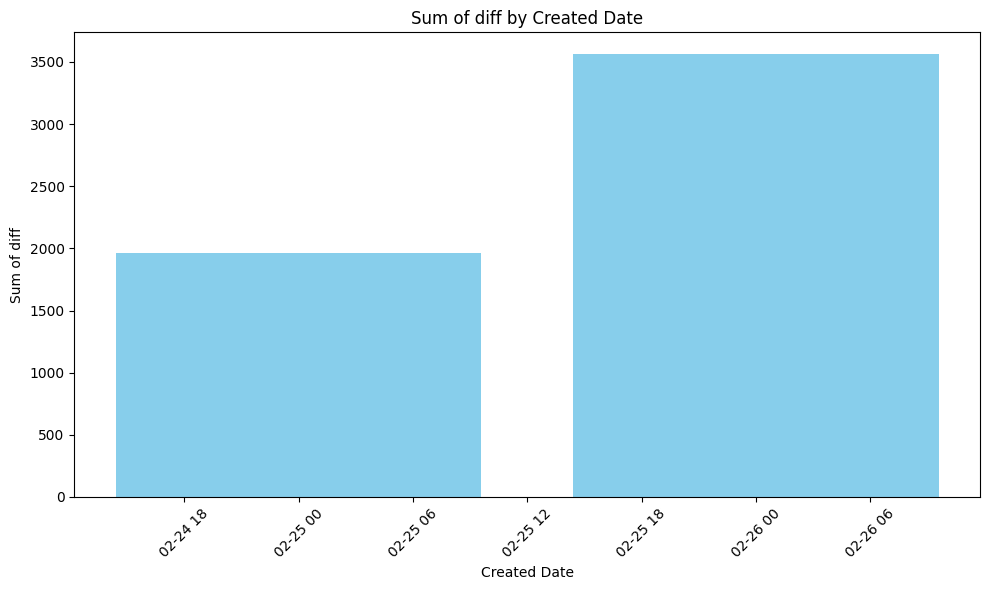

In [30]:
# 'created_at'をdatetime型に変換し、日付のみにする
df['created_at'] = pd.to_datetime(df['created_at']).dt.date

# 'created_at'でグループ化し、'diff'の合計を計算
diff_by_date = df.groupby('created_at')['diff'].sum()

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを調整
plt.bar(diff_by_date.index, diff_by_date.values, color='skyblue') #棒グラフ

# グラフのタイトルとラベル
plt.title('Sum of diff by Created Date')
plt.xlabel('Created Date')
plt.ylabel('Sum of diff')

#x軸の日付表示を回転
plt.xticks(rotation=45)

# グラフの表示
plt.tight_layout()  # レイアウトの調整
plt.show()

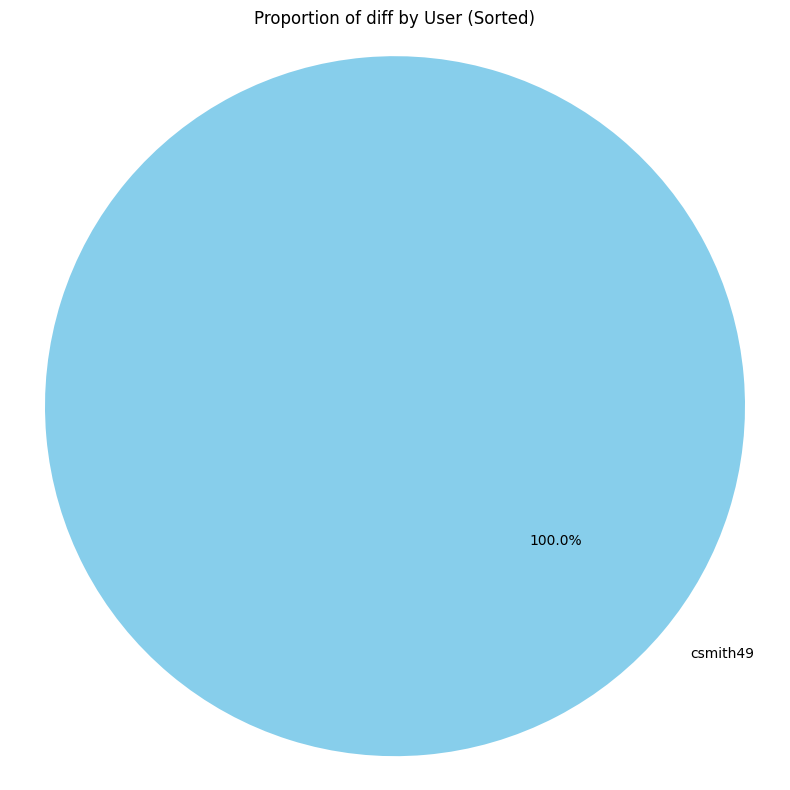

In [31]:
import matplotlib.pyplot as plt

# 'user'でグループ化し、'diff'の合計を計算
diff_by_user = df.groupby('user')['diff'].sum()

# diffの合計値で降順にソート
diff_by_user_sorted = diff_by_user.sort_values(ascending=False)


# 円グラフの作成
plt.figure(figsize=(8, 8))
# ソートされたデータを使用
plt.pie(diff_by_user_sorted, labels=diff_by_user_sorted.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])

plt.title('Proportion of diff by User (Sorted)') #タイトルも変更
plt.axis('equal')
plt.tight_layout()
plt.show()